[![Binder](https://mybinder.org/badge_logo.svg)](https://nbviewer.org/github/Sistemas-Multimedia/Sistemas-Multimedia.github.io/blob/master/milestones/gray_compression/compare_quantizers.ipynb)

# Quantizers comparison in the Gray-scale domain

In [1]:
!ln -sf ~/MRVC/src/debug.py .
!ln -sf ~/MRVC/src/logging_config.py .
!ln -sf ~/repos/scalar_quantization/distortion.py .
!ln -sf ~/repos/image_IO/image_3.py .
!ln -sf ~/repos/image_IO/image_1.py .
!ln -sf ~/repos/scalar_quantization/information.py .
!ln -sf ~/repos/image_IO/logging_config.py .

In [2]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.axes as ax
#plt.rcParams['text.usetex'] = True
#plt.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}'] #for \text command
import pylab
import math
import numpy as np
from scipy import signal
import cv2
import os
#!pwd
#import deadzone_quantizer as deadzone
#import midtread_quantizer as midtread
#import midrise_quantizer as midrise
#import companded_quantizer as companded
import distortion
import image_3 as RGB_image
import image_1 as gray_image
import colored
#import common
import information

In [3]:
try:
    midrise_RD = []
    with open(f"mid-rise_RD_points.txt", 'r') as f:
        for line in f:
            rate, _distortion = line.split('\t')
            midrise_RD.append((float(rate), float(_distortion)))
except FileNotFoundError:
    %run ./midrise.ipynb

In [4]:
try:
    deadzone_RD = []
    with open(f"dead-zone_RD_points.txt", 'r') as f:
        for line in f:
            rate, _distortion = line.split('\t')
            deadzone_RD.append((float(rate), float(_distortion)))
except FileNotFoundError:
    %run ./deadzone.ipynb

In [5]:
try:
    midtread_RD = []
    with open(f"mid-tread_RD_points.txt", 'r') as f:
        for line in f:
            rate, _distortion = line.split('\t')
            midtread_RD.append((float(rate), float(_distortion)))
except FileNotFoundError:
    %run ./midtread.ipynb

In [10]:
try:
    companded_RD = []
    with open(f"companded_RD_points.txt", 'r') as f:
        for line in f:
            rate, _distortion = line.split('\t')
            companded_RD.append((float(rate), float(_distortion)))
except FileNotFoundError:
    %run ./companded.ipynb

"/home/vruiz/repos" exists
/home/vruiz/repos/scalar_quantization ... 
Ya está actualizado.
/home/vruiz/repos/MRVC ... 
Ya está actualizado.
/home/vruiz/repos/image_IO ... 
Ya está actualizado.
total 148
-rw-r--r-- 1 vruiz vruiz 151199 feb 18 22:33 000.png


[image_1.py:62 print_stats() INFO] max=245 min=25 avg=124.05046081542969


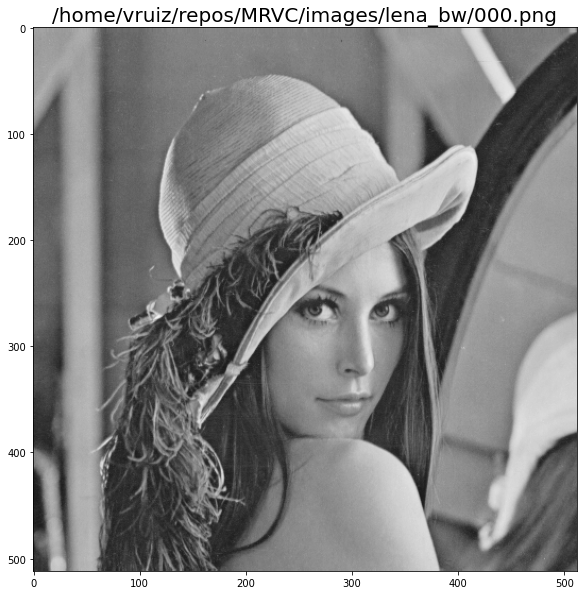

[image_1.py:62 print_stats() INFO] max=193.35490113214263 min=54.706814212908526 avg=124.0504608154297
[image_1.py:62 print_stats() INFO] max=193.35490113214263 min=54.706814212908526 avg=124.0504608154297


512 4 (512, 512) 4 4
centroids [145.87992564  54.70681421 193.35490113 103.92459965]
labels [[0 0 0 ... 2 0 0]
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 2 0 0]
 ...
 [1 1 1 ... 3 3 3]
 [1 1 1 ... 3 3 3]
 [1 1 1 ... 3 3 3]] (512, 512)
max and min dequantized image 193.35490113214263 54.706814212908526
prediction = [[0 0 0 ... 2 0 0]
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 2 0 0]
 ...
 [1 1 1 ... 3 3 3]
 [1 1 1 ... 3 3 3]
 [1 1 1 ... 3 3 3]]
prediction.shape = (512, 512)


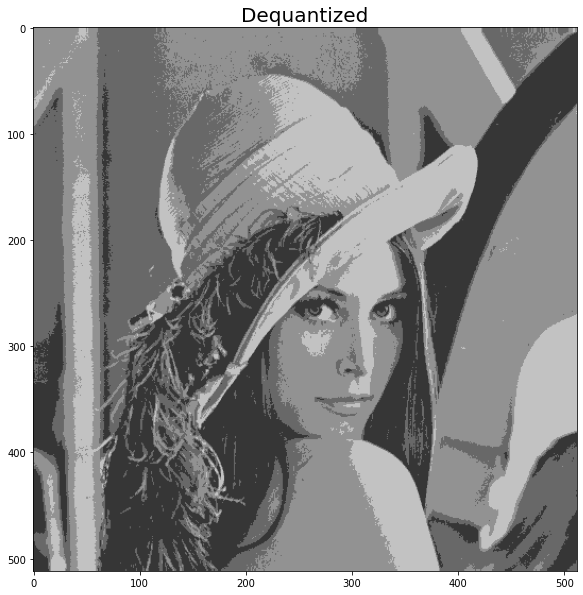

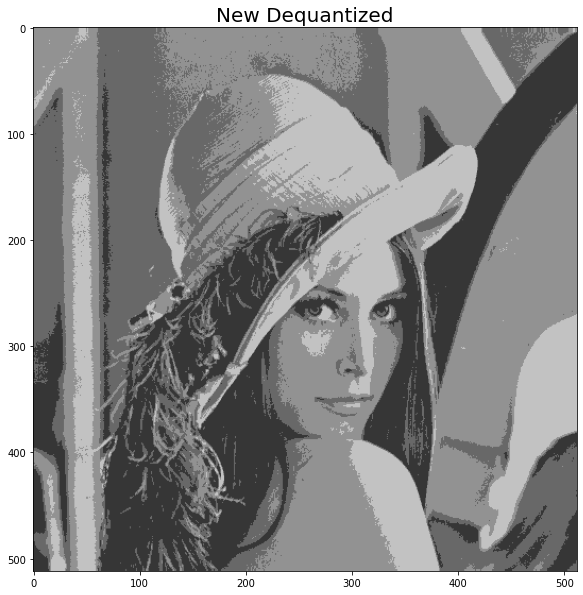

/home/vruiz/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1146: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)
[image_1.py:62 print_stats() INFO] max=7 min=0 avg=3.305561065673828
[image_1.py:62 print_stats() INFO] max=206.3058141577376 min=47.99065177199698 avg=124.05046081542967


[  0  59  84 109 131 149 169 193 255]
[ 47.99065177  71.88186468  98.10032899 121.84709241 140.77099295
 158.1160013  180.06251408 206.30581416]
Used quantization indexes: [0 1 2 3 4 5 6 7]
MSE = 41.4681107652788
SSIM = 0.7825227406679108
entropy = 2.9539800243685574


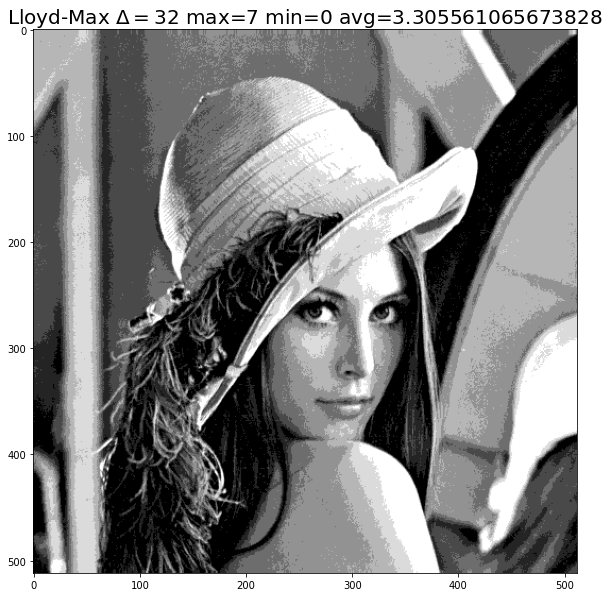

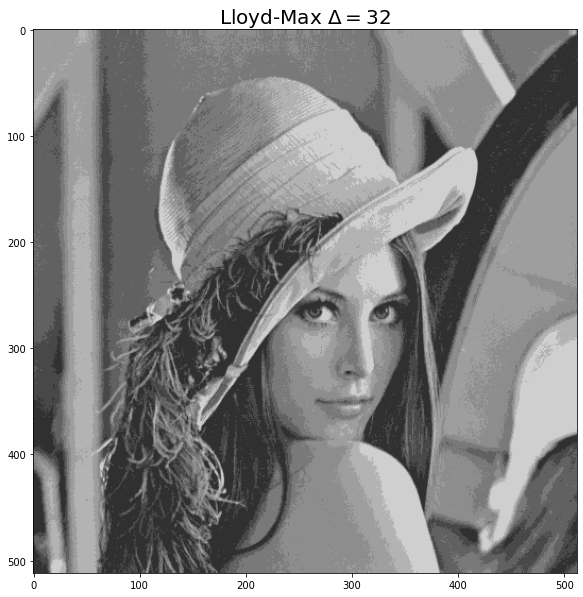

/home/vruiz/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1146: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)
[image_1.py:36 debug_write() INFO] image_1.write: /tmp/2_000.png (512, 512) int32 len=11195 max=1 min=0


Quantization indexes:  [0 1]


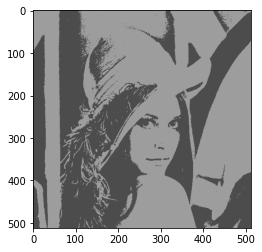

n=  2, rate=0.341644287109375 bits/pixel, distortion=  26.2


/home/vruiz/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1146: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)
[image_1.py:36 debug_write() INFO] image_1.write: /tmp/4_000.png (512, 512) int32 len=22608 max=3 min=0


Quantization indexes:  [0 1 2 3]


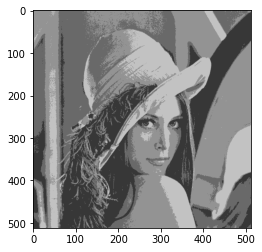

n=  4, rate=0.68994140625 bits/pixel, distortion=  12.7
Quantization indexes:  [0 1 2 3 4 5 6 7]


/home/vruiz/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1146: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)
[image_1.py:36 debug_write() INFO] image_1.write: /tmp/8_000.png (512, 512) int32 len=37953 max=7 min=0


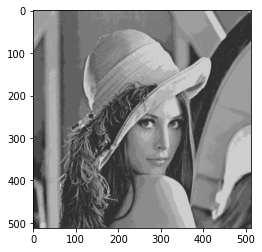

/home/vruiz/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1146: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


n=  8, rate=1.158233642578125 bits/pixel, distortion=   6.4
Quantization indexes:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]


[image_1.py:36 debug_write() INFO] image_1.write: /tmp/16_000.png (512, 512) int32 len=66582 max=15 min=0
/home/vruiz/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1146: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


n= 16, rate=2.03192138671875 bits/pixel, distortion=   3.6
Quantization indexes:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31]


[image_1.py:36 debug_write() INFO] image_1.write: /tmp/32_000.png (512, 512) int32 len=106462 max=31 min=0
/home/vruiz/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1146: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


n= 32, rate=3.24896240234375 bits/pixel, distortion=   2.0


[image_1.py:36 debug_write() INFO] image_1.write: /tmp/64_000.png (512, 512) int32 len=132125 max=63 min=0


Quantization indexes:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63]
n= 64, rate=4.032135009765625 bits/pixel, distortion=   1.0


/home/vruiz/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1146: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)
[image_1.py:36 debug_write() INFO] image_1.write: /tmp/128_000.png (512, 512) int32 len=167477 max=127 min=0


Quantization indexes:  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127]
n=128, rate=5.110992431640625 bits/pixel, distortion=   0.5
Quantization indexes:  [0 1]


[image_1.py:36 debug_write() INFO] image_1.write: /tmp/2_000.png (512, 512) uint8 len=11195 max=1 min=0


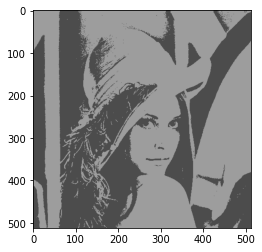

n=  2, rate=0.341644287109375 bits/pixel, distortion=  26.3


[image_1.py:36 debug_write() INFO] image_1.write: /tmp/4_000.png (512, 512) uint8 len=26021 max=3 min=0


Quantization indexes:  [0 1 2 3]


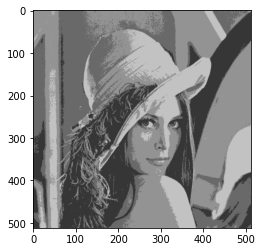

n=  4, rate=0.794097900390625 bits/pixel, distortion=  12.7


[image_1.py:36 debug_write() INFO] image_1.write: /tmp/8_000.png (512, 512) uint8 len=48565 max=7 min=0


Quantization indexes:  [0 1 2 3 4 5 6 7]


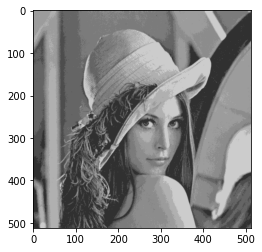

n=  8, rate=1.482086181640625 bits/pixel, distortion=   6.4
Quantization indexes:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]


[image_1.py:36 debug_write() INFO] image_1.write: /tmp/16_000.png (512, 512) uint8 len=88335 max=15 min=0


n= 16, rate=2.695770263671875 bits/pixel, distortion=   3.4


[image_1.py:36 debug_write() INFO] image_1.write: /tmp/32_000.png (512, 512) uint8 len=155177 max=31 min=0


Quantization indexes:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31]
n= 32, rate=4.735626220703125 bits/pixel, distortion=   1.8


[image_1.py:36 debug_write() INFO] image_1.write: /tmp/64_000.png (512, 512) uint8 len=204420 max=63 min=0


Quantization indexes:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63]
n= 64, rate=6.2384033203125 bits/pixel, distortion=   1.0


[image_1.py:36 debug_write() INFO] image_1.write: /tmp/128_000.png (512, 512) uint8 len=242234 max=127 min=0


Quantization indexes:  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127]
n=128, rate=7.39239501953125 bits/pixel, distortion=   0.6


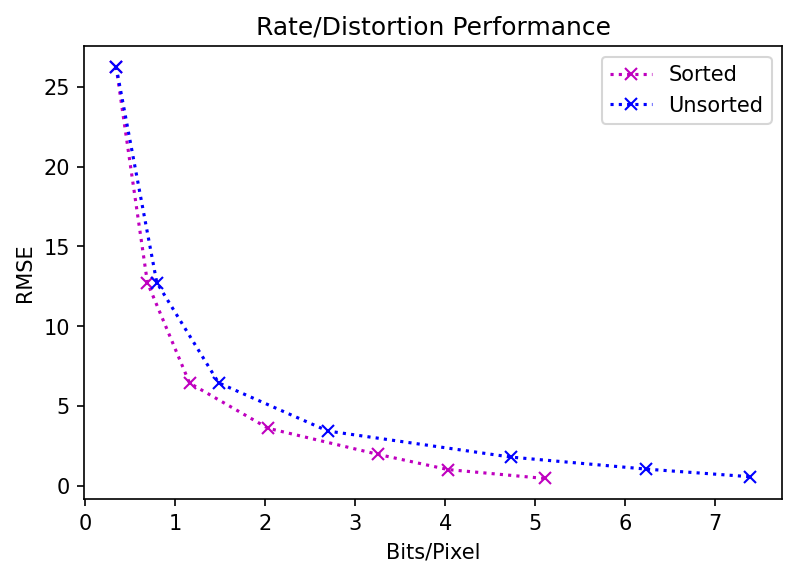

In [7]:
try:
    Lloyd_Max_RD = []
    with open(f"Lloyd-Max_RD_points.txt", 'r') as f:
        for line in f:
            rate, _distortion = line.split('\t')
            Lloyd_Max_RD.append((float(rate), float(_distortion)))
except FileNotFoundError:
    %run ./LloydMax.ipynb

In [8]:
#VQ = []
#with open(f"VQ_RD_points.txt", 'r') as f:
#    for line in f:
#        rate, _distortion = line.split('\t')
#        VQ.append((float(rate), float(_distortion)))

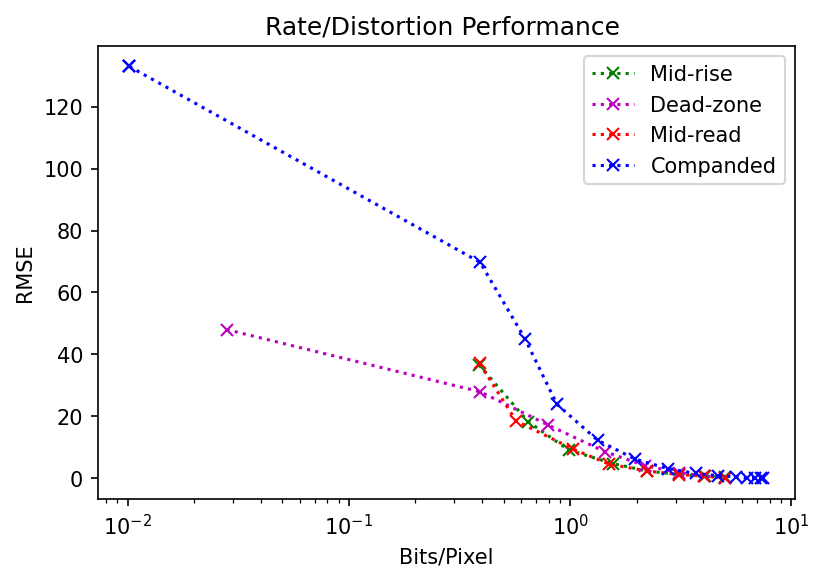

In [11]:
pylab.figure(dpi=150)
pylab.plot(*zip(*midrise_RD), c='g', marker='x', label="Mid-rise", linestyle="dotted")
pylab.plot(*zip(*deadzone_RD), c='m', marker='x', label="Dead-zone", linestyle="dotted")
pylab.plot(*zip(*midtread_RD), c='r', marker='x', label="Mid-read", linestyle="dotted")
pylab.plot(*zip(*companded_RD), c='b', marker='x', label="Companded", linestyle="dotted")
pylab.plot(*zip(*Lloyd_Max_RD), c='y', marker='x', label="Lloyd-Max", linestyle="dotted")
#pylab.plot(*zip(*VQ), c='k', marker='x', label="VQ", linestyle="dotted")
pylab.title("Rate/Distortion Performance ")
pylab.xlabel("Bits/Pixel")
pylab.ylabel("RMSE")
pylab.legend(loc='upper right')
pylab.xscale("log")
#pylab.yscale("log")
pylab.show()